# Лабораторна робота 2
Завдання 1

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
# Завантажити таблицю з Вікіпедії

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2] # Таблиця, що містить дані про ВВП
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [ ]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [ ]:
# Поточні назви стовпців
current_columns = [
    ('Country/Territory', 'Country/Territory'),
    ('IMF[1][13]', 'Forecast'),
    ('IMF[1][13]', 'Year'),
    ('World Bank[14]', 'Estimate'),
    ('World Bank[14]', 'Year'),
    ('United Nations[15]', 'Estimate'),
    ('United Nations[15]', 'Year')
]
# Зручні назви стовпців
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]
# Перетворимо MultiIndex на однорівневий індекс з новими назвами
df.columns = new_columns
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [ ]:
#Виберемо необхідні стовпці та надамо їм нові назви
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}
df1 = df[['Country'] + list(selected_columns.keys())]

df = df1.rename(columns = selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [ ]:
#Виведемо розмір датасету
df.shape

(210, 4)

In [ ]:
#Перевіримо наявність відсутніх значень у кожному стовпці
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
#Виведемо типи даних кожного стовпця
print("\nТипи даних кожного стовпця: \n", df.dtypes)


Типи даних кожного стовпця: 
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [ ]:
# Замінити всі неперетворювані значення на Nan
df.replace('-', float('nan'), inplace=True)

# Переведемо стовпці у тип float
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

# Виведемо типи даних після конвертації
print("\nТипи даних після конвертації: \n", df.dtypes)

# Відобразимо перші кілька рядків для перевірки
df.head(10)


Типи даних після конвертації: 
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [ ]:
import numpy as np
df = df.replace({'—': np.NaN})
df = df.drop([0], axis=0)

df = df.fillna(df.mean(numeric_only=True))
df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0


In [ ]:
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [ ]:
# Перевірити наявність дублікатів. При наявності видалити дублікати.
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Якщо є дублікти, видалимо їх
if duplicates > 0:
    df = df.drop_duplicates()
    print("Дублікатів видалено.")
else:
    print("Дублікатів не знайдено.")

Кількість дублікатів: 0
Дублікатів не знайдено.


In [ ]:
# Вивести описову статистику датасету describe()
df_description = df.describe()
print("Описова статистика датасету:\n", df_description)

Описова статистика датасету:
            MVF_2024  WorldBank_2023      OON_2022
count  2.090000e+02    2.090000e+02  2.090000e+02
mean   5.644339e+05    5.178115e+05  4.811087e+05
std    2.435307e+06    2.325859e+06  2.236743e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.446700e+04    1.043800e+04  8.772000e+03
50%    5.631000e+04    4.320500e+04  3.171700e+04
75%    4.099890e+05    3.355330e+05  2.371010e+05
max    2.878108e+07    2.736094e+07  2.574410e+07


In [ ]:
# Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?
df['Difference_MVF_WB'] = df['MVF_2024'] - df['WorldBank_2023']

# Знайдемо країни з найбільшим відхиленням
max_diff_country = df.loc[df['Difference_MVF_WB'].idxmax()]['Country']
max_diff_value = df['Difference_MVF_WB'].max()

min_diff_country = df.loc[df['Difference_MVF_WB'].idxmin()]['Country']
min_diff_value = df['Difference_MVF_WB'].min()

print(f"Країна з найбільшим відхиленням: {max_diff_country} ({max_diff_value})")
print(f"Країна з найменшим відхиленням: {min_diff_country} ({min_diff_value})")

Країна з найбільшим відхиленням: United States (1420148.0)
Країна з найменшим відхиленням: South Sudan (-511294.4726368159)


In [ ]:
# Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

# Виведемо кореляційну матрицю
print("Кореляційна матриця:\n", correlation_matrix)

Кореляційна матриця:
                 MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.998216  0.997244
WorldBank_2023  0.998216        1.000000  0.998610
OON_2022        0.997244        0.998610  1.000000


In [ ]:
# Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середні значення для кожного року:\n", mean_values)

Середні значення для кожного року:
 MVF_2024          564433.932990
WorldBank_2023    517811.472637
OON_2022          481108.673077
dtype: float64


In [ ]:
# Обчислимо стандартне відхилення показників для кожної країни
df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Знайдемо країну з найвищою варіативністю
max_var_country = df.loc[df['Std_Deviation'].idxmax()]['Country']
max_var_value = df['Std_Deviation'].max()

print(f"Країна з найвищою варіативністю: {max_var_country} ({max_var_value})")

Країна з найвищою варіативністю: United States (1519552.648063348)


In [ ]:
# Знайдемо країни з найвищими та найнижчими показниками у кожному з років
max_mvf_country = df.loc[df['MVF_2024'].idxmax()]['Country']
min_mvf_country = df.loc[df['MVF_2024'].idxmin()]['Country']

max_wb_country = df.loc[df['WorldBank_2023'].idxmax()]['Country']
min_wb_country = df.loc[df['WorldBank_2023'].idxmin()]['Country']

max_oon_country = df.loc[df['OON_2022'].idxmax()]['Country']
min_oon_country = df.loc[df['OON_2022'].idxmin()]['Country']

print(f"Країна з найвищим показником MVF_2024: {max_mvf_country}")
print(f"Країна з найнижчим показником MVF_2024: {min_mvf_country}")
print(f"Країна з найвищим показником WorldBank_2023: {max_wb_country}")
print(f"Країна з найнижчим показником WorldBank_2023: {min_wb_country}")
print(f"Країна з найвищим показником OON_2022: {max_oon_country}")
print(f"Країна з найнижчим показником OON_2022: {min_oon_country}")

Країна з найвищим показником MVF_2024: United States
Країна з найнижчим показником MVF_2024: Tuvalu
Країна з найвищим показником WorldBank_2023: United States
Країна з найнижчим показником WorldBank_2023: Tuvalu
Країна з найвищим показником OON_2022: United States
Країна з найнижчим показником OON_2022: Tuvalu


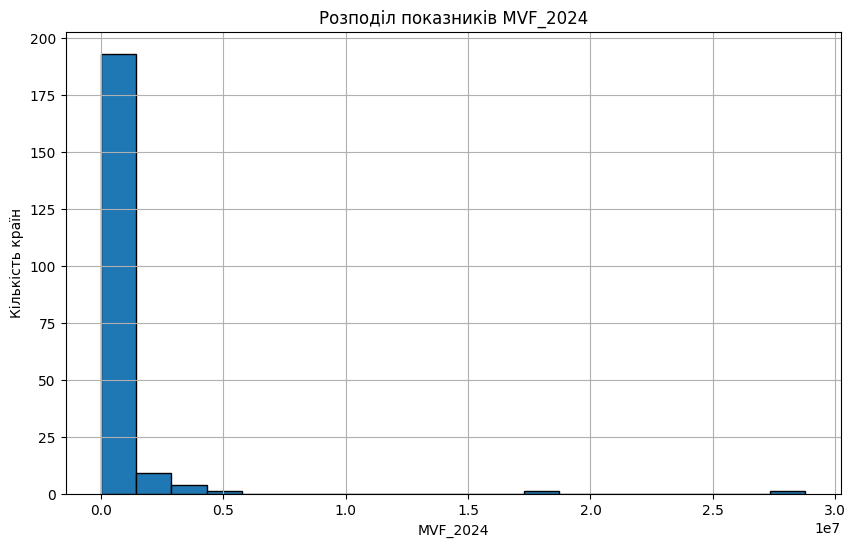

In [ ]:
import matplotlib.pyplot as plt

# Побудуємо гістограму для розподілу MVF_2024
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'].dropna(), bins=20, edgecolor='black')
plt.title('Розподіл показників MVF_2024')
plt.xlabel('MVF_2024')
plt.ylabel('Кількість країн')
plt.grid(True)
plt.show()

In [ ]:
# Обчислимо частку кожної країни в загальному значенні для кожного року
df['Share_MVF_2024'] = df['MVF_2024'] / df['MVF_2024'].sum() * 100
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / df['WorldBank_2023'].sum() * 100
df['Share_OON_2022'] = df['OON_2022'] / df['OON_2022'].sum() * 100

print("Частки кожної країни у загальному значенні:\n", df[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])

Частки кожної країни у загальному значенні:
               Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
1       United States       24.397635             25.282090       25.602846
2               China       15.710056             16.442760       17.864609
3             Germany        3.891861              4.117514        4.054554
4               Japan        3.484417              3.892851        4.208952
5               India        3.337392              3.280201        3.446526
..                ...             ...                   ...             ...
205          Kiribati        0.000264              0.000258        0.000222
206             Palau        0.000261              0.000243        0.000224
207  Marshall Islands        0.000259              0.000262        0.000277
208             Nauru        0.000136              0.000142        0.000146
209            Tuvalu        0.000056              0.000057        0.000059

[209 rows x 4 columns]


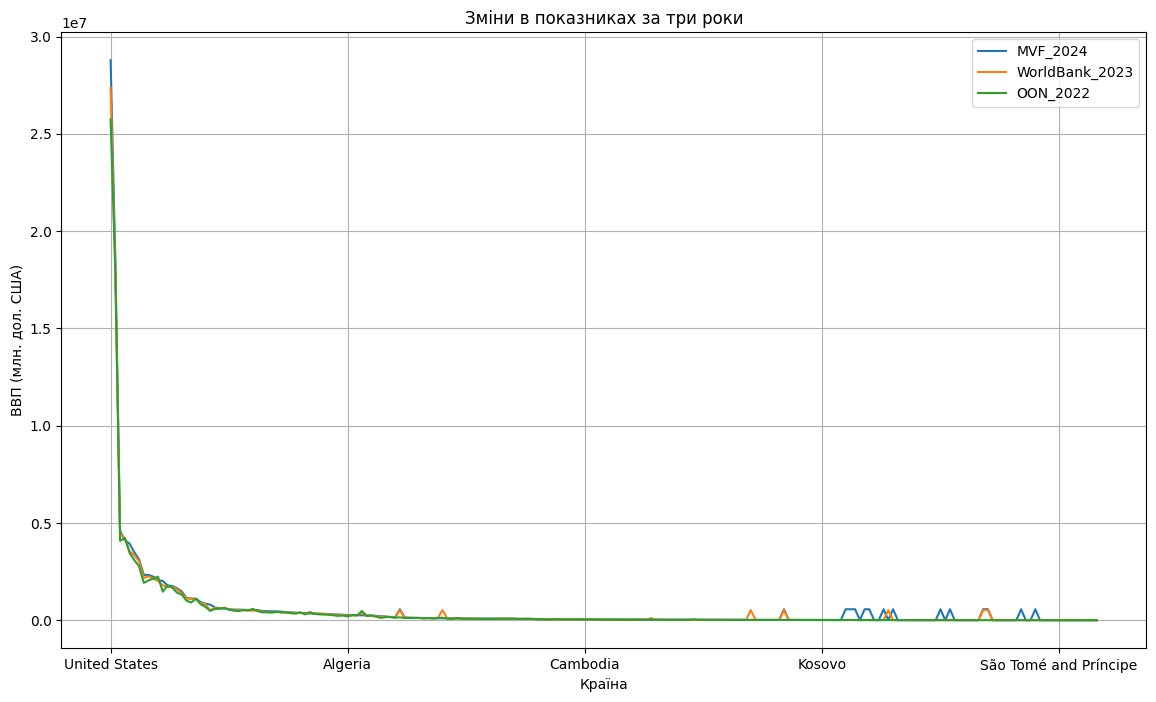

In [ ]:
# Побудуємо графіки зміни показників для кожної країни
df.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].plot(figsize=(14, 8))
plt.title('Зміни в показниках за три роки')
plt.xlabel('Країна')
plt.ylabel('ВВП (млн. дол. США)')
plt.grid(True)
plt.show()

Висновок - у першому завданні зчитати датасет ВВП за країнами з Вікіпедії.Обчислила стандартне відхилення показників для кожної країни, визначила країни з найвищим та найнижчим показниками, побудувала гістограму для розподілу показників.

#Завдання 2

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df['Age'].mean(skipna=True )

30.272590361445783

In [ ]:
df['Age'].fillna(df['Age'].median(skipna=True), inplace=True)

In [ ]:
df['Fare'].fillna(df['Fare'].value_counts().idxmax(), inplace=True)

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
#Сформуємо датасет з обраними стовпцями
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [ ]:
df.shape

(418, 5)

In [ ]:
df.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,35.560497
std,0.481622,0.841838,12.703770,55.857145
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,23.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,35.750000,31.471875
max,1.000000,3.000000,76.000000,512.329200


In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
Fare,float64


In [ ]:
#Перетворення  значень за допомогою replace
print(df['Sex'].unique())
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)

df.dtypes

[0 1]


,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250
6,1,3,1,30.0,7.6292
7,0,2,0,26.0,29.0000
8,1,3,1,18.0,7.2292
9,0,3,0,21.0,24.1500


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [ ]:
# Виведення перших 5 рядків
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [ ]:
# Виведення останніх 5 рядків
df.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,27.0,8.0500
414,1,1,1,39.0,108.9000
415,0,3,0,38.5,7.2500
416,0,3,0,27.0,8.0500
417,0,3,0,27.0,22.3583


In [ ]:
#Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі.
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання  залежно від статі:")
print(survival_by_sex)

Відсоток виживання  залежно від статі:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [ ]:
# Відсоток виживання для кожного класу
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання для кожного класу:")
print(survival_by_pclass)

Відсоток виживання для кожного класу:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [ ]:
# Середній вік тих, хто вижив та не вижив
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()
print("Середній вік тих, хто вижив:", mean_age_survived)
print("Середній вік тих, хто не вижив:", mean_age_not_survived)

Середній вік тих, хто вижив: 29.734144736842108
Середній вік тих, хто не вижив: 29.52221804511278


In [ ]:
# Розподіл тарифів (Fare) і рівень виживання
fare_bins = [0, 10, 20, 30, 40, 50, 100, 200, 500]
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins)
survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100
print("Рівень виживання за групами тарифів:")
print(survival_by_fare_group)

Рівень виживання за групами тарифів:
FareGroup
(0, 10]       27.450980
(10, 20]      31.707317
(20, 30]      40.845070
(30, 40]      47.619048
(40, 50]      25.000000
(50, 100]     48.979592
(100, 200]    53.846154
(200, 500]    64.705882
Name: Survived, dtype: float64


<ipython-input-75-1efad7eaea93>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


In [ ]:
# Середній тариф для кожного класу
mean_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Середній тариф для кожного класу:")
print(mean_fare_by_pclass)

Середній тариф для кожного класу:
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [ ]:
# Середній вік пасажирів для кожного класу
mean_age_by_pclass = df.groupby('Pclass')['Age'].mean()
print("Середній вік пасажирів для кожного класу:")
print(mean_age_by_pclass)

Середній вік пасажирів для кожного класу:
Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


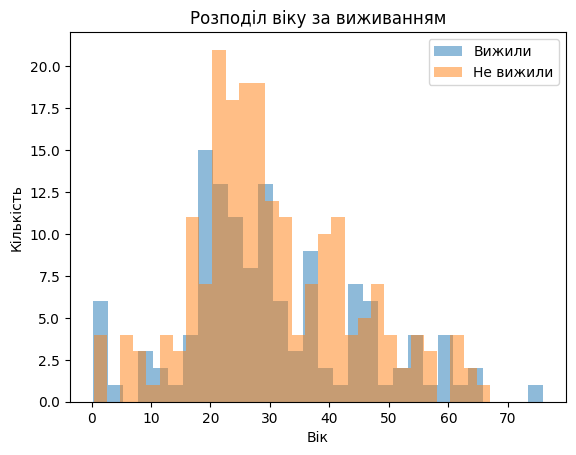

In [ ]:
# Гістограма розподілу віку
import matplotlib.pyplot as plt

plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=30, alpha=0.5, label='Вижили')
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=30, alpha=0.5, label='Не вижили')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()
plt.title('Розподіл віку за виживанням')
plt.show()

In [ ]:
# Відсоток виживання для кожної комбінації статі та класу
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання для кожної комбінації статі та класу:")
print(survival_by_sex_pclass)

Відсоток виживання для кожної комбінації статі та класу:
Sex     Pclass
female  1         100.0
        2         100.0
        3         100.0
male    1           0.0
        2           0.0
        3           0.0
Name: Survived, dtype: float64


In [ ]:
# Кореляція між числовими змінними
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print("Кореляція між числовими змінними:")
print(correlation_matrix)

Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000013  0.191514
Pclass   -0.108615  1.000000 -0.492143 -0.577147
Age      -0.000013 -0.492143  1.000000  0.337932
Fare      0.191514 -0.577147  0.337932  1.000000


Висновок - у другому завданні я аналізувала датасет Титанік, виводила рядки, визначила розмір датасету, перевіряла наявність дублікату, сформувала датасет, аналізувала виживання залежно від статті - в жінок більший % виживання. Найвищий % виживання має 1 клас, Середній вік тих, хто вижив: 29.7, Середній вік тих, хто не вижив: 29.5 - на мою думку вік впливає на виживання. Обчислила середній вік для кожного класу - 1 клас 40 років, 2 клас - 28 років, 3 клас - 24роки. Побудувала гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
https://github.com/dassha5/machine_learning